In [1]:
from diffusers.image_processor import VaeImageProcessor
from diffusers import AutoencoderKL
import torch

# batch*channel*h*w  tensor数据
def denormalize(normalized_data):
    prefix = "/public/home/yangzhe/ltt/lsj/git_workspace/OOTDiffusion-old"
    VAE_PATH = prefix+"/checkpoints/ootd"

    vae = AutoencoderKL.from_pretrained(
        VAE_PATH,
        subfolder="vae",
        torch_dtype=torch.float16,
    )

    vae_scale_factor = 2 ** (len(vae.config.block_out_channels) - 1)

    image_processor = VaeImageProcessor(vae_scale_factor=vae_scale_factor)
    ### 上面 image_processor 解决了 ###
    ### output_type ? do_denormalize ?
    output_type: str = "pil"
    # do_denormalize ?
    batch = normalized_data.shape[0]
    do_denormalize=[True]*(batch)

    image = image_processor.postprocess(
            normalized_data.float(),
            output_type=output_type, 
            do_denormalize=do_denormalize)
    return image

/public/home/yangzhe/miniconda3/envs/ootd/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
all_file=os.listdir('/public/home/yangzhe/ltt/lsj/OOTD_attn/')
all_file=sorted(all_file)[:20]
print(all_file)

['16-11:06:38.pth', '16-11:06:42.pth', '16-11:06:45.pth', '16-11:06:49.pth', '16-11:06:52.pth', '16-11:06:56.pth', '16-11:06:59.pth', '16-11:07:02.pth', '16-11:07:05.pth', '16-11:07:09.pth', '16-11:07:12.pth', '16-11:07:15.pth', '16-11:07:19.pth', '16-11:07:22.pth', '16-11:07:25.pth', '16-11:07:29.pth', '16-11:07:32.pth', '16-11:07:36.pth', '16-11:07:39.pth', '16-11:07:42.pth']


# 第1层注意力

In [29]:
prefix = '/public/home/yangzhe/ltt/lsj/OOTD_attn/'
'''
all_attn=[]
for f in all_file:
    attn=torch.load(f'{prefix}{f}',map_location=torch.device('cpu'))
    all_attn.append(attn)
'''
attn=torch.load(f'{prefix}{all_file[0]}',map_location=torch.device('cpu'))

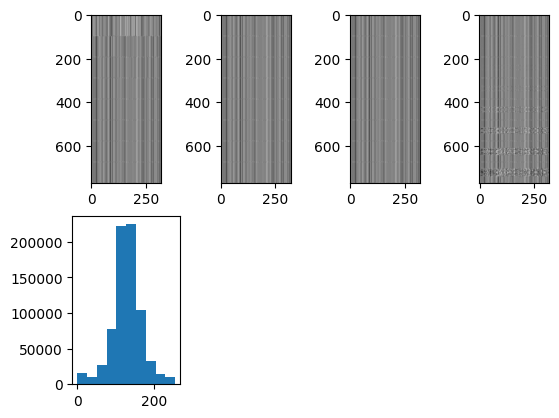

In [72]:
attn_np = [a.unsqueeze(dim=0).float().numpy() for a in attn]

tmp=attn[0][:3,:,:].unsqueeze(0)
# (12288, 320, 3)
img=denormalize(tmp)

for i in range(4):
    plt.subplot(2,4,i+1)
    img_np=np.array(img[0])[768*i:768*(i+1),:,:]
    plt.imshow(img_np)
plt.subplot(2,4,5)
plt.hist(img_np.flatten(),bins=10)
plt.show()


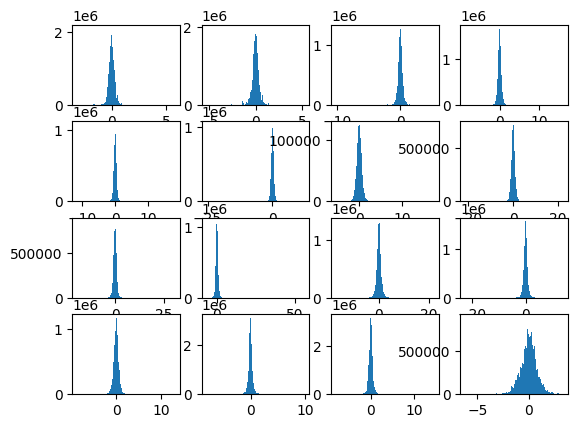

In [14]:
for idx,a_np in enumerate(attn_np):
    plt.subplot(4,4,idx+1)
    plt.hist(a_np.flatten(),bins=256)
plt.show()

# 第2层注意力

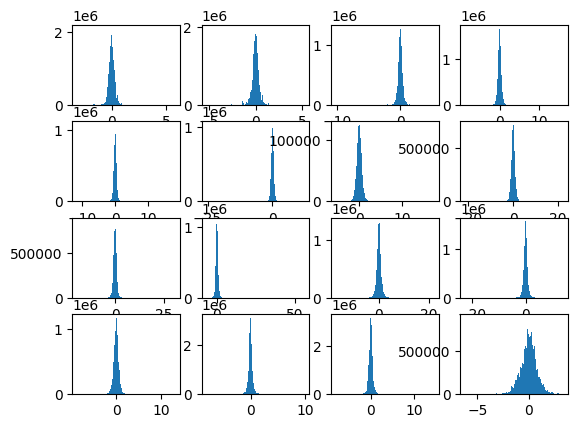

In [16]:
index=1
prefix = '/public/home/yangzhe/ltt/lsj/OOTD_attn/'
attn=torch.load(f'{prefix}{all_file[index]}',map_location=torch.device('cpu'))
attn_np = [a.numpy() for a in attn]
for idx,a_np in enumerate(attn_np):
    plt.subplot(4,4,idx+1)
    plt.hist(a_np.flatten(),bins=256)
plt.show()

# 第3层注意力

In [ ]:
index=2
prefix = '/public/home/yangzhe/ltt/lsj/OOTD_attn/'
attn=torch.load(f'{prefix}{all_file[index]}',map_location=torch.device('cpu'))
attn_np = [a.numpy() for a in attn]
for idx,a_np in enumerate(attn_np):
    plt.subplot(4,4,idx+1)
    plt.hist(a_np.flatten(),bins=256)
plt.show()

# 第4层注意力

In [ ]:
index=3
prefix = '/public/home/yangzhe/ltt/lsj/OOTD_attn/'
attn=torch.load(f'{prefix}{all_file[index]}',map_location=torch.device('cpu'))
attn_np = [a.numpy() for a in attn]
for idx,a_np in enumerate(attn_np):
    plt.subplot(4,4,idx+1)
    plt.hist(a_np.flatten(),bins=256)
plt.show()

# 第5层注意力

In [ ]:
index=4
prefix = '/public/home/yangzhe/ltt/lsj/OOTD_attn/'
attn=torch.load(f'{prefix}{all_file[index]}',map_location=torch.device('cpu'))
attn_np = [a.numpy() for a in attn]
for idx,a_np in enumerate(attn_np):
    plt.subplot(4,4,idx+1)
    plt.hist(a_np.flatten(),bins=256)
plt.show()

# 第6层注意力

In [ ]:
index=5
prefix = '/public/home/yangzhe/ltt/lsj/OOTD_attn/'
attn=torch.load(f'{prefix}{all_file[index]}',map_location=torch.device('cpu'))
attn_np = [a.numpy() for a in attn]
for idx,a_np in enumerate(attn_np):
    plt.subplot(4,4,idx+1)
    plt.hist(a_np.flatten(),bins=256)
plt.show()

# 第7层注意力

In [ ]:
index=6
prefix = '/public/home/yangzhe/ltt/lsj/OOTD_attn/'
attn=torch.load(f'{prefix}{all_file[index]}',map_location=torch.device('cpu'))
attn_np = [a.numpy() for a in attn]
for idx,a_np in enumerate(attn_np):
    plt.subplot(4,4,idx+1)
    plt.hist(a_np.flatten(),bins=256)
plt.show()

# 第8层注意力

In [ ]:
index=7
prefix = '/public/home/yangzhe/ltt/lsj/OOTD_attn/'
attn=torch.load(f'{prefix}{all_file[index]}',map_location=torch.device('cpu'))
attn_np = [a.numpy() for a in attn]
for idx,a_np in enumerate(attn_np):
    plt.subplot(4,4,idx+1)
    plt.hist(a_np.flatten(),bins=256)
plt.show()

# 第9层注意力

In [ ]:
index=8
prefix = '/public/home/yangzhe/ltt/lsj/OOTD_attn/'
attn=torch.load(f'{prefix}{all_file[index]}',map_location=torch.device('cpu'))
attn_np = [a.numpy() for a in attn]
for idx,a_np in enumerate(attn_np):
    plt.subplot(4,4,idx+1)
    plt.hist(a_np.flatten(),bins=256)
plt.show()

# 第10层注意力

In [ ]:
index=9
prefix = '/public/home/yangzhe/ltt/lsj/OOTD_attn/'
attn=torch.load(f'{prefix}{all_file[index]}',map_location=torch.device('cpu'))
attn_np = [a.numpy() for a in attn]
for idx,a_np in enumerate(attn_np):
    plt.subplot(4,4,idx+1)
    plt.hist(a_np.flatten(),bins=256)
plt.show()

# 第11层注意力

In [ ]:
index=10
prefix = '/public/home/yangzhe/ltt/lsj/OOTD_attn/'
attn=torch.load(f'{prefix}{all_file[index]}',map_location=torch.device('cpu'))
attn_np = [a.numpy() for a in attn]
for idx,a_np in enumerate(attn_np):
    plt.subplot(4,4,idx+1)
    plt.hist(a_np.flatten(),bins=256)
plt.show()

# 第12层注意力

In [ ]:
index=11
prefix = '/public/home/yangzhe/ltt/lsj/OOTD_attn/'
attn=torch.load(f'{prefix}{all_file[index]}',map_location=torch.device('cpu'))
attn_np = [a.numpy() for a in attn]
for idx,a_np in enumerate(attn_np):
    plt.subplot(4,4,idx+1)
    plt.hist(a_np.flatten(),bins=256)
plt.show()

# 第13层注意力

In [ ]:
index=12
prefix = '/public/home/yangzhe/ltt/lsj/OOTD_attn/'
attn=torch.load(f'{prefix}{all_file[index]}',map_location=torch.device('cpu'))
attn_np = [a.numpy() for a in attn]
for idx,a_np in enumerate(attn_np):
    plt.subplot(4,4,idx+1)
    plt.hist(a_np.flatten(),bins=256)
plt.show()

# 第14层注意力

In [ ]:
index=13
prefix = '/public/home/yangzhe/ltt/lsj/OOTD_attn/'
attn=torch.load(f'{prefix}{all_file[index]}',map_location=torch.device('cpu'))
attn_np = [a.numpy() for a in attn]
for idx,a_np in enumerate(attn_np):
    plt.subplot(4,4,idx+1)
    plt.hist(a_np.flatten(),bins=256)
plt.show()

# 第15层注意力

In [ ]:
index=14
prefix = '/public/home/yangzhe/ltt/lsj/OOTD_attn/'
attn=torch.load(f'{prefix}{all_file[index]}',map_location=torch.device('cpu'))
attn_np = [a.numpy() for a in attn]
for idx,a_np in enumerate(attn_np):
    plt.subplot(4,4,idx+1)
    plt.hist(a_np.flatten(),bins=256)
plt.show()

# 第16层注意力

In [ ]:
index=15
prefix = '/public/home/yangzhe/ltt/lsj/OOTD_attn/'
attn=torch.load(f'{prefix}{all_file[index]}',map_location=torch.device('cpu'))
attn_np = [a.numpy() for a in attn]
for idx,a_np in enumerate(attn_np):
    plt.subplot(4,4,idx+1)
    plt.hist(a_np.flatten(),bins=256)
plt.show()

# 第17层注意力

In [ ]:
index=16
prefix = '/public/home/yangzhe/ltt/lsj/OOTD_attn/'
attn=torch.load(f'{prefix}{all_file[index]}',map_location=torch.device('cpu'))
attn_np = [a.numpy() for a in attn]
for idx,a_np in enumerate(attn_np):
    plt.subplot(4,4,idx+1)
    plt.hist(a_np.flatten(),bins=256)
plt.show()

# 第18层注意力

In [ ]:
index=17
prefix = '/public/home/yangzhe/ltt/lsj/OOTD_attn/'
attn=torch.load(f'{prefix}{all_file[index]}',map_location=torch.device('cpu'))
attn_np = [a.numpy() for a in attn]
for idx,a_np in enumerate(attn_np):
    plt.subplot(4,4,idx+1)
    plt.hist(a_np.flatten(),bins=256)
plt.show()

# 第19层注意力

In [ ]:
index=18
prefix = '/public/home/yangzhe/ltt/lsj/OOTD_attn/'
attn=torch.load(f'{prefix}{all_file[index]}',map_location=torch.device('cpu'))
attn_np = [a.numpy() for a in attn]
for idx,a_np in enumerate(attn_np):
    plt.subplot(4,4,idx+1)
    plt.hist(a_np.flatten(),bins=256)
plt.show()

# 第20层注意力

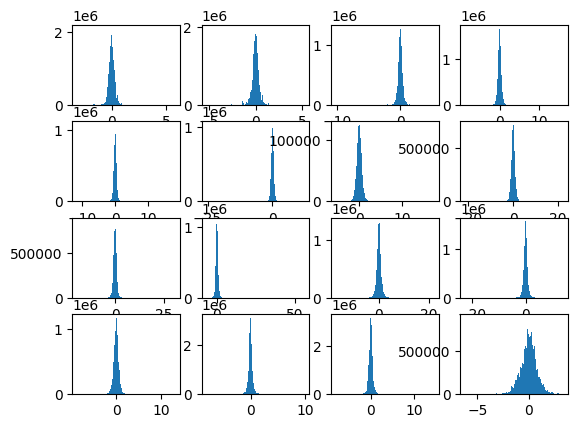

In [17]:
index=19
prefix = '/public/home/yangzhe/ltt/lsj/OOTD_attn/'
attn=torch.load(f'{prefix}{all_file[index]}',map_location=torch.device('cpu'))
attn_np = [a.numpy() for a in attn]
for idx,a_np in enumerate(attn_np):
    plt.subplot(4,4,idx+1)
    plt.hist(a_np.flatten(),bins=256)
plt.show()

# 其他

In [3]:
attn = torch.load('/public/home/yangzhe/ltt/lsj/OOTD_attn/16-11:07:42.pth',map_location=torch.device('cpu'))

In [ ]:
'''
每个pth有16个attn               len=16
每个attn有8个channel            size=8*12288*320
每个channel可以显示4张图片       h=768 w=320
'''
'''
函数中本来image给的shape=4*3*1024*768
现在的数据是 16  8*(768*4)*320
'''

In [4]:
mean_attns=[]
for a in attn:
    mean_attn=a.mean(dim=0)
    mean_attns.append(mean_attn)
min_attns=[]
for a in attn:
    min_attn=a.min(dim=0)
    min_attns.append(min_attn)
max_attns=[]
for a in attn:
    max_attn=a.max(dim=0)
    max_attns.append(max_attn)

In [31]:
test_attn=mean_attns[0] # 12288*320
test_attn=test_attn.unsqueeze(0).unsqueeze(0) # 1*1*12288*320

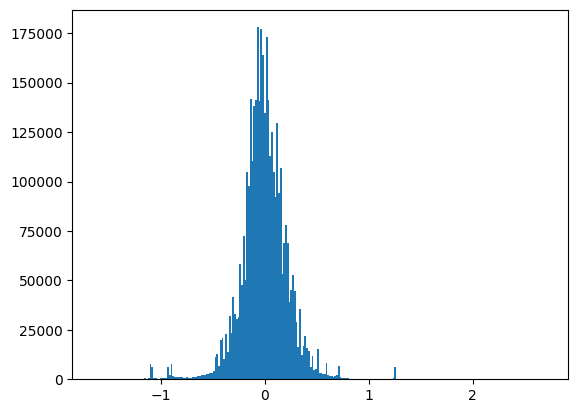

In [33]:
plt.hist(test_attn.numpy().flatten(),bins=256)
plt.show()

In [13]:
test_attn.float().dtype

torch.float32

In [17]:
res=denormalize(test_attn) # list len=batch=1

In [20]:
type(res[0])

PIL.Image.Image

In [21]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
# 数值 0~255
res_array=np.array(res[0])  # (12288, 320)

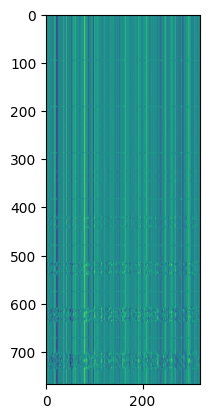

In [30]:
base=768
plt.imshow(res_array[base*3:base*4,:])

# noise

In [7]:
prefix='/public/home/yangzhe/ltt/lsj/OOTD_attn/'
noise_path=lambda i: f'{prefix}noise_pred-{i}.pth'

In [31]:
# 0~19
noise_path1=noise_path(0)
noise_path10=noise_path(9)
noise_path18=noise_path(17)
noise_path20=noise_path(19)

In [10]:
noise1=torch.load(noise_path1,map_location='cpu')

In [11]:
noise1.shape

torch.Size([4, 4, 128, 96])

In [13]:
imgs=denormalize(noise1)

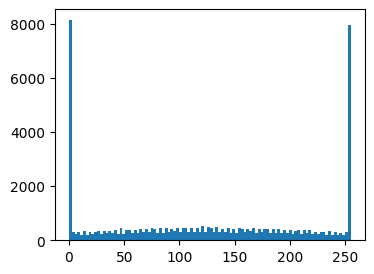

In [18]:
plt.figure(figsize=(4,3))
plt.hist(np.array(imgs[0]).flatten(),bins=100)
plt.show()

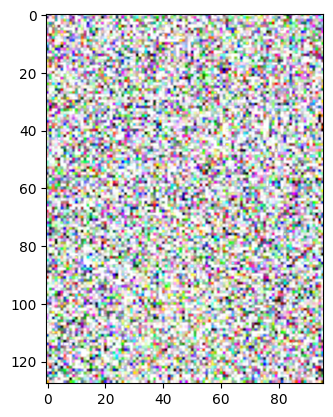

In [19]:
plt.imshow(np.array(imgs[0]))

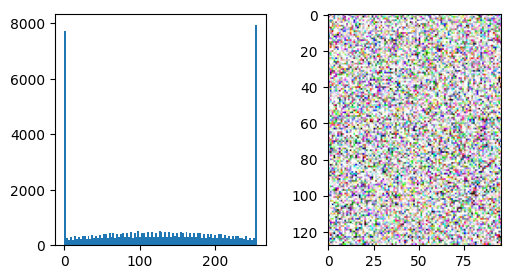

In [23]:
noise10=torch.load(noise_path10,map_location='cpu')
imgs=denormalize(noise10)
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plt.hist(np.array(imgs[0]).flatten(),bins=100)
plt.subplot(1,2,2)
plt.imshow(np.array(imgs[0]))
plt.show()

In [26]:
(noise1 != noise10).sum()

tensor(196203)

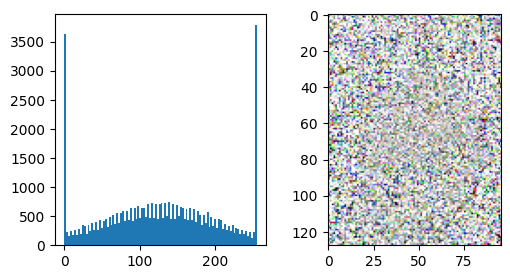

In [32]:
noise18=torch.load(noise_path18,map_location='cpu')
imgs=denormalize(noise18)
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plt.hist(np.array(imgs[0]).flatten(),bins=100)
plt.subplot(1,2,2)
plt.imshow(np.array(imgs[0]))
plt.show()

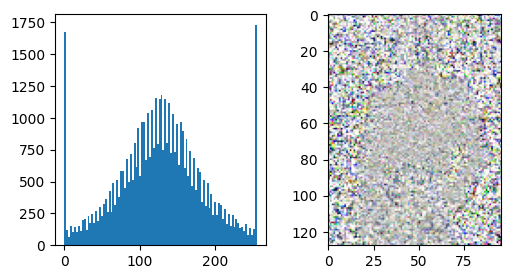

In [27]:
noise20=torch.load(noise_path20,map_location='cpu')
imgs=denormalize(noise20)
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plt.hist(np.array(imgs[0]).flatten(),bins=100)
plt.subplot(1,2,2)
plt.imshow(np.array(imgs[0]))
plt.show()

# Xt-1

In [33]:
prefix='/public/home/yangzhe/ltt/lsj/OOTD_attn/'
x_path=lambda i: f'{prefix}X-{i}.pth'

In [34]:
# 0~19
X_path1=x_path(0)
X_path10=x_path(9)
X_path18=x_path(17)
X_path20=x_path(19)

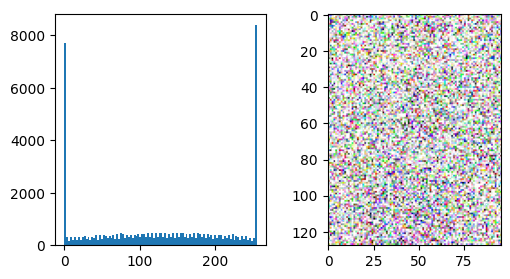

In [35]:
x1=torch.load(X_path1,map_location='cpu')
imgs=denormalize(x1)
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plt.hist(np.array(imgs[0]).flatten(),bins=100)
plt.subplot(1,2,2)
plt.imshow(np.array(imgs[0]))
plt.show()

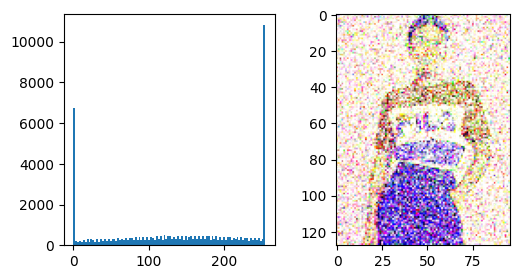

In [36]:
x10=torch.load(X_path10,map_location='cpu')
imgs=denormalize(x10)
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plt.hist(np.array(imgs[0]).flatten(),bins=100)
plt.subplot(1,2,2)
plt.imshow(np.array(imgs[0]))
plt.show()

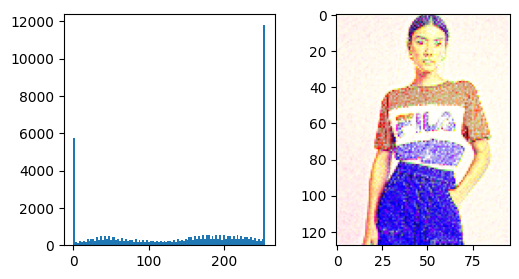

In [37]:
x18=torch.load(X_path18,map_location='cpu')
imgs=denormalize(x18)
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plt.hist(np.array(imgs[0]).flatten(),bins=100)
plt.subplot(1,2,2)
plt.imshow(np.array(imgs[0]))
plt.show()

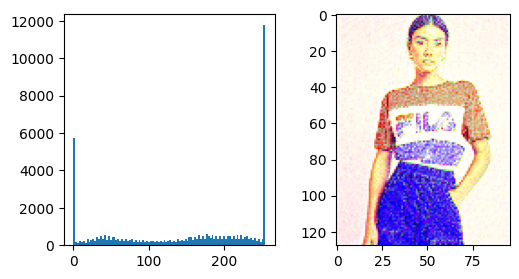

In [38]:
x20=torch.load(X_path20,map_location='cpu')
imgs=denormalize(x20)
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plt.hist(np.array(imgs[0]).flatten(),bins=100)
plt.subplot(1,2,2)
plt.imshow(np.array(imgs[0]))
plt.show()